Since version 0.3, krisk introduced two type of tidy plot: `bar_tidy` and `line_tidy`. The difference between this plot, is that it take away every data manipulation schemes that usually reside in normal plot. In return, tidy plots assume you manipulate the data in your own way. The data must be tidy format, which is famously defined from Hadley Wickham. 

The characteristics of tidy format defined in krisk as follows:

* DataFrame is only 2-dimension. There is no hierarchical columns or index
* Data is cleaned and aggregated
* No duplicate values for each index-column pair

This will make it easier for krisk to identify the axes and series, such that:
* index is used for category x-axis.
* each column corresponds to one series.

Let's take a look at this in more detail.

In [3]:
import krisk.plot as kk
from krisk import init_notebook; init_notebook()

<IPython.core.display.Javascript object>

## Time Series

One example that we can use Time Series data is from Wes Mckinney's Book, [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do). The following are codes example that used from the GitHub repo [here](https://github.com/wesm/pydata-book/blob/master/ch10.ipynb#Time-series-plotting).

In [10]:
%matplotlib inline
import pandas as pd

In the notebook, Wes showed an example of using time series plotting using stock data.

In [ ]:
close_px_all = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/master/ch09/stock_px.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')

In [17]:
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


This is the plot looks like,

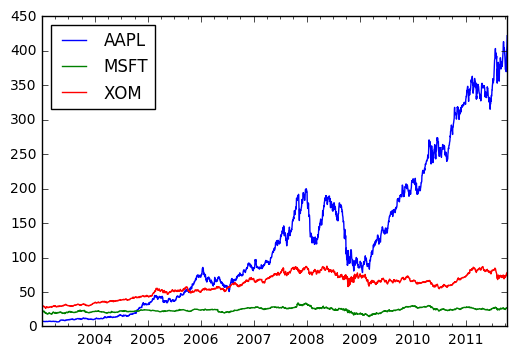

In [11]:
close_px.plot()

And here is what krisk `line_tidy` plot does instead.

In [15]:
kk.line_tidy(close_px)

With this basic plot, you can hover horizontally to see values each line, and use the legend to control enable/disable  line.

This is is only single `pd.Series` looks like in plotting.

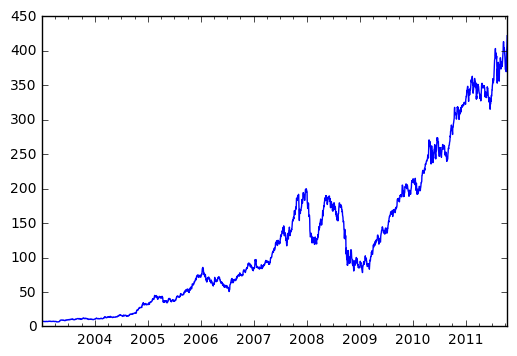

In [12]:
close_px['AAPL'].plot()

And this is what krisk `line_tidy` plot looks like.

In [16]:
kk.line_tidy(close_px['AAPL'])

Of course there's more. Like `line` krisk plot, aside from data manipulation parameters, you can use stacked area charts as follows.

In [23]:
kk.line_tidy(close_px, area=True, stacked=True)

Or using full stacked area chart. Note that using `full` will eventually manipulate the data you own so it normalize to 1.

In [20]:
kk.line_tidy(close_px, area=True, stacked=True, full=True)

`bar_tidy` plot also can be used like `line_tidy` plot.

In [28]:
gapminder =  (pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/'
                              'examples/gapminder/data/'
                              'gapminderDataFiveYear.txt', sep='\t')
              .pivot_table(values='lifeExp', index='year', columns='continent', aggfunc='mean'))

In [29]:
gapminder.head()

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,39.135500,53.27984,46.314394,64.408500,69.255
1957,41.266346,55.96028,49.318544,66.703067,70.295
1962,43.319442,58.39876,51.563223,68.539233,71.085
1967,45.334538,60.41092,54.663640,69.737600,71.310
1972,47.450942,62.39492,57.319269,70.775033,71.910


In [30]:
kk.bar_tidy(gapminder)

In [35]:
gapminder.shape

(12, 5)

In [39]:
[e['stack'] for e in _34['series']] 

['unnamed', 'unnamed', 'unnamed', 'unnamed', 'unnamed', 'unnamed']

In [40]:
gapminder.shape[1] * ['unnamed']

['unnamed', 'unnamed', 'unnamed', 'unnamed', 'unnamed']

In [34]:
kk.bar_tidy(gapminder, stacked=True, trendline=True, annotate=True).option

{'legend': {'align': 'auto',
  'bottom': 'auto',
  'data': ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
  'left': 'auto',
  'orient': 'horizontal'},
 'series': [{'data': [39.136,
    41.266,
    43.319,
    45.335,
    47.451,
    49.58,
    51.593,
    53.345,
    53.63,
    53.598,
    53.325,
    54.806],
   'name': 'Africa',
   'stack': 'unnamed',
   'type': 'bar'},
  {'data': [53.28,
    55.96,
    58.399,
    60.411,
    62.395,
    64.392,
    66.229,
    68.091,
    69.568,
    71.15,
    72.422,
    73.608],
   'name': 'Americas',
   'stack': 'unnamed',
   'type': 'bar'},
  {'data': [46.314,
    49.319,
    51.563,
    54.664,
    57.319,
    59.611,
    62.618,
    64.851,
    66.537,
    68.021,
    69.234,
    70.728],
   'name': 'Asia',
   'stack': 'unnamed',
   'type': 'bar'},
  {'data': [64.408,
    66.703,
    68.539,
    69.738,
    70.775,
    71.938,
    72.806,
    73.642,
    74.44,
    75.505,
    76.701,
    77.649],
   'name': 'Europe',
   'stack': 'unna